#### 08_21 21:48  

#### 미국의 대표적인 P2P 대출업체 Lending Club
#####  이후에 그와 비슷한 한국의 8percent

In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup


%matplotlib inline

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

from IPython.display import Image

# Lending Club

In [4]:
df=pd.read_csv("./data/loan_sample.csv")
df
#대출 기간별 대출 총액(1. agg, 2.apply, 3.pivot_table, 4.crosstab)
#-----      -------
# term    load_amnt

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.000000,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.000000,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.000000,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.000000,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.000000,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000.0,5000.0,5000.000000,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000.0,7000.0,7000.000000,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,1288686,3000.0,3000.0,3000.000000,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,1306957,5600.0,5600.0,5600.000000,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,1306721,5375.0,5375.0,5350.000000,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

In [7]:
# 원래 이 데이터는 대단히 '민감한' 데이터인데,  공개되어 있는 이유는

# kaggle 에 공개된 부분
# https://www.kaggle.com/wendykan/lending-club-loan-data

# 사람들의 신용을 바탕으로 이 채권이 부도가 날지, 잘 상환을 할지 예측하는 문제  <-- 실제 데이터로 맞추는 문제 였다


In [19]:
# csvkit 모듈
# 파이썬으로 csv 다루기 좋은 모듈 + 툴

# 파이썬으로 csv 다루려면 항상 DaraFrame 으로 가져와서 뜯어오고 했어야 했는데..
# 귀찮을 경우 csvkit 추천

# ex)
# !csvcut csv파일
# !csvlook csv파일    <-- 이쁘게 보여줌 

# !cat csv파일 | head -n 10 | csvlook      <-- 상위 10개만 잘라서 이쁘게 보여줌

# csv 데이터 많이 다룬다면 
# csvkit, csvcut, csvlook  <-- 이런거 함 써보자 

## TODO : 대출기간별 (term) 대출금액(loan_amnt), 합계 / 평균 / 개수
- agg() 로도 해보고  apply() 로도 해보자

#### 08_21 00:34:33

In [21]:
group = df.groupby(df.term.apply(lambda x: x[:3]))
group.size()

term
 36    6649
 60    3351
dtype: int64

In [22]:
group = df.groupby(df.term)
# group = df.groupby("term")

group.size()

term
 36 months    6649
 60 months    3351
dtype: int64

#### agg() 로 도전

In [23]:
# 산술연산 가능한 모든 영역에 대해 sum
group.agg("sum")

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
term,,,,,,,,,,,,,,,,,,,,,
36 months,6416722403,7893621734,65864200.0,65833875.0,6.556600e+07,71734.71,2153128.67,4.437814e+08,90725.36,869.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60 months,3218722489,3958477875,62752175.0,61042725.0,6.047446e+07,52550.76,1485022.13,2.588836e+08,49180.18,466.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
group.agg("sum")["loan_amnt"]

term
 36 months    65864200.0
 60 months    62752175.0
Name: loan_amnt, dtype: float64

In [24]:
# 위의 결과는 아래과 같이 해도 된다.
group["loan_amnt"].agg("sum")    # <-- 실질적으론 group.agg("sum")["loan_amnt] 가 이렇게 최적화 되어 실행된다

term
 36 months    65864200.0
 60 months    62752175.0
Name: loan_amnt, dtype: float64

In [12]:
group.agg({
    "loan_amnt":{
        "합계":"sum",
        "평균":"mean",
        "갯수":"count"
    }
})

c:\users\frogt\appdata\local\programs\python\python36\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


loan_amnt                    
                    합계            평균    갯수
term                                      
 36 months  65864200.0   9905.880584  6649
 60 months  62752175.0  18726.402566  3351

In [13]:
group.agg({
    "loan_amnt":{
        "합계":"sum",
        "평균":"mean",
        "갯수":"count"
    }
})["loan_amnt"]

c:\users\frogt\appdata\local\programs\python\python36\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,합계,평균,갯수
term,,,
36 months,65864200.0,9905.880584,6649
60 months,62752175.0,18726.402566,3351


In [ ]:
group["loan_amnt"].agg(["sum","mean","count"])

#### apply() 로 도전!

In [25]:
def get_loan_amnt_sum(loan_df):
    return loan_df.loan_amnt.sum()

group.apply(get_loan_amnt_sum)

term
 36 months    65864200.0
 60 months    62752175.0
dtype: float64

In [27]:
def get_loan_amnt_sum(loan_df):
    return pd.Series(  
        [loan_df.loan_amnt.sum(), len(loan_df)],
        index=["대출금액 합계", "대출 건수"]
    )

group.apply(get_loan_amnt_sum)   # Series 를 리턴 받아서 DataFrame 을 결과 내준다

,대출금액 합계,대출 건수
term,,
36 months,65864200.0,6649.0
60 months,62752175.0,3351.0


####  T 를 하면? 

In [28]:
group.agg({
    "loan_amnt":{
        "합계":"sum",
        "평균":"mean",
        "갯수":"count"
    }
}).T

# 좀더 index level 로 다루기 편리할때가 있다

c:\users\frogt\appdata\local\programs\python\python36\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


term             36 months     60 months
loan_amnt 합계  6.586420e+07  6.275218e+07
          평균  9.905881e+03  1.872640e+04
          갯수  6.649000e+03  3.351000e+03

In [ ]:
# 위 결과를 agg 뿐 아니라 apply, pivot_table, crosstab 등을 통해서도 만들수 있다
# 시간되면 도전해보자

# 8percent

In [30]:
# https://8percent.kr/investments/history
# 8percent.kr 의 '투자하기 메뉴

# 전체 채권 정보가 있다.

#### TODO : 일단 크롤링
> 맨 밑으로 내려서 지난 투자 상품 보기
동적 데이터 형태

In [33]:
# 동적페이징 + html 코드가 넘어오는 형태다

In [23]:
# _dataset/8percent.py
!cat ../../_dataset/8percent.py

def crawl_8pecent(page_num):
    url = "https://8percent.kr/investments/history/?page={page}".format(page=page_num)
    response = requests.get(url)
    dom = BeautifulSoup(response.text, "html.parser")
    elements = dom.select(".Import_558")
    # print(elements)
    return [
        {
            "등급": element.select_one(".box-1699").text.strip(),
            "수익률": float(element.select_one(".text-1699").text.strip()[:-2]),
            "기간": int(element.select_one(".text-1700").text.strip()[:-2]),
        }
        for element
        in elements
    ]

crawl_8pecent(1)


In [34]:
# 1. 코드 복사하셔서 동작하지는 테스트
# 2. 대출 금액까지 크롤링할 수 있도록 약간 코드 수정하기! 

def crawl_8percent(page_num):
    url = "https://8percent.kr/investments/history/?page={page}".format(page=page_num)
    response = requests.get(url)
    dom = BeautifulSoup(response.text, "html.parser")
    # DOM ( Document Object Model )
    
    elements = dom.select(".Import_558")
    return [
        {
            "등급": element.select_one(".box-1699").text.strip(),
            "수익률": float(element.select_one(".text-1699").text.strip()[:-2]),
            "기간": int(element.select_one(".text-1700").text.strip()[:-2]),
            "대출금액": int(element.select_one(".Text_116").text.strip().replace(",", "")),    # , 제거
        }
        for element
        in elements
    ]

crawl_8percent(1)

[{'기간': 12, '대출금액': 518, '등급': 'B', '수익률': 9.1},
 {'기간': 12, '대출금액': 209, '등급': 'B', '수익률': 8.7},
 {'기간': 12, '대출금액': 518, '등급': 'C+', '수익률': 10.7},
 {'기간': 12, '대출금액': 518, '등급': 'B', '수익률': 8.1},
 {'기간': 6, '대출금액': 200, '등급': 'B+', '수익률': 9.7},
 {'기간': 12, '대출금액': 312, '등급': 'B-', '수익률': 9.9},
 {'기간': 12, '대출금액': 206, '등급': 'C+', '수익률': 11.4},
 {'기간': 6, '대출금액': 300, '등급': 'B', '수익률': 11.4},
 {'기간': 12, '대출금액': 518, '등급': 'B', '수익률': 9.2},
 {'기간': 12, '대출금액': 312, '등급': 'B', '수익률': 9.1},
 {'기간': 6, '대출금액': 70, '등급': 'B', '수익률': 11.4},
 {'기간': 12, '대출금액': 312, '등급': 'B', '수익률': 8.1}]

###  TODO 10페이지 분량 크롤링 해서 DataFrame 합치기

In [35]:
# 여러 페이지를 crawl 해온 각각의 DaraFrame 을 합치려면?

# 1. df.append(df2)
# 2. pd.concat([df1, df2, ...])



In [38]:
df = pd.concat([
    pd.DataFrame(crawl_8percent(page))
    for page
    in range(1, 10 + 1)
])

df.head()

,기간,대출금액,등급,수익률
0,12,518,B,9.1
1,12,209,B,8.7
2,12,518,C+,10.7
3,12,518,B,8.1
4,6,200,B+,9.7


In [39]:
df.shape

(120, 4)

In [40]:
# 혹은 이렇게도 나누어 가능
# dfs = [
#      pd.DataFrame(crawl_8percent(page))
#     for page
#     in range(1, 10 + 1)
# ]
# df = pd.concat(dfs)


In [41]:
df.to_csv("./out/8percent.csv", index=False)

In [43]:
# 등급별 수익률?
# 대출자 입장에서는 이율 일텐데..   등급이 낮으면 수익률은 높다


## 등급 컬럼을  '등급' 과  '세부등급' 으로 나누어 보자


In [47]:
# 등급
# A
# A+
# A-  
#  를 아래와 같이 바꾸자

# 등급   세부등급
# A       A0
# A       A+
# A        A-


# 세부등급 컬럼을 추가 해보라는 말

In [45]:
# 삼항연산자     
df.등급.apply(
    # g => "D+", "B", "C-"
    lambda g: g if g.endswith("+") or g.endswith("-") else g + "0"
)

0     B0
1     B0
2     C+
3     B0
4     B+
5     B-
6     C+
7     B0
8     B0
9     B0
10    B0
11    B0
0     C0
1     C+
2     B+
3     B-
4     C+
5     B+
6     C-
7     C0
8     B0
9     C0
10    C0
11    C+
0     C0
1     C0
2     B+
3     B+
4     B-
5     D0
      ..
6     C-
7     C+
8     B0
9     C-
10    D0
11    D+
0     C+
1     A-
2     C-
3     C-
4     C+
5     C-
6     C0
7     C0
8     C0
9     B0
10    D0
11    D0
0     B-
1     D0
2     B+
3     C+
4     B0
5     C+
6     A-
7     C+
8     C-
9     C0
10    C+
11    C0
Name: 등급, Length: 120, dtype: object

In [48]:
df  # 등급, 세부등급
    # A    A0
    # A    A+
    # A    A-
    
df["세부등급"] = df.등급.apply(
    # g => "D+", "B", "C-"
    lambda g: g if g.endswith("+") or g.endswith("-") else g + "0"
)

In [49]:
# 기존의 '등급' 컬럼의 +, - 기호 제거
df.등급 = df.세부등급.apply(lambda g: g[0])

In [50]:
df

,기간,대출금액,등급,수익률,세부등급
0,12,518,B,9.1,B0
1,12,209,B,8.7,B0
2,12,518,C,10.7,C+
3,12,518,B,8.1,B0
4,6,200,B,9.7,B+
5,12,312,B,9.9,B-
6,12,206,C,11.4,C+
7,6,300,B,11.4,B0
8,12,518,B,9.2,B0
9,12,312,B,9.1,B0


## TODO: 채권의 세부등급별 수익률(대출이율) 그래프

In [52]:
# 이것에 대한 그래프 그리면 된다
df.groupby("세부등급").agg({"수익률": "mean"})

,수익률
세부등급,
A+,5.100000
A-,8.575000
A0,8.050000
B+,8.820000
B-,11.118182
B0,9.523810
C+,11.978261
C-,15.650000
C0,14.963636


Text(0.5,1,'8퍼센트 세부등급별 수익률')

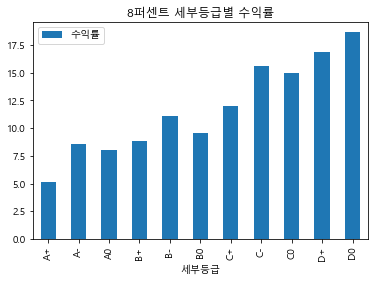

In [55]:
ax = df.groupby("세부등급").agg({"수익률": "mean"}).plot(kind="bar")
ax.set_title("8퍼센트 세부등급별 수익률")

#### 08_21 종료